# Figures COSIPY
## Glaciohydrological analysis in Mocho glacier - 2023
#### Paul Sandoval Quilodrán - https://github.com/SQPaul/...

#### import packages

In [1]:
import glob

from operator import itemgetter

import xarray as xr
import rasterio as rio
import geopandas as gpd

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import mapping

import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta

from rasterio.transform import from_origin
from rasterio.transform import Affine

import openpyxl

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import dask.array as da

# Initial snow

In [2]:
#Define path initsnow
path_22 = '/home/phi/Documents/Mocho-COSIPY/input/input_mocho-choshuenco_20221014-20230313_v5.nc'
path_21 = '/home/phi/Documents/Mocho-COSIPY/input/input_mocho-choshuenco_20211008-20220408.nc'

#Define glacier Mocho Choshuenco
path_glacier_22 = '/home/phi/Documents/Mocho-COSIPY/input/glacier_outlines/mocho-choshuenco_2022_4326_mod.shp'
path_glacier_21 = '/home/phi/Documents/Mocho-COSIPY/input/glacier_outlines/mocho-choshuenco_2021_4326_mod.shp'

#Define glacier Mocho
path_mocho_22 = '/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/GIS/Geometrias_finales/Glaciar_Mocho_2022.gpkg'
path_mocho_21 = '/media/phi/Hard_disk3/Projects/Mocho_DGA/Data_para_tesis_JLR/2021/Cuenca_SO_2021.shp'

#Read initial snow
init_snow_22 = xr.open_dataset(path_22)['SNOWHEIGHT']
init_snow_22 = init_snow_22.rio.write_crs("EPSG:4326", inplace=True)

init_snow_21 = xr.open_dataset(path_21)['SNOWHEIGHT']
init_snow_21 = init_snow_21.rio.write_crs("EPSG:4326", inplace=True)

#Read geometries
glacier_22 = gpd.read_file(path_glacier_22)
glacier_22 = glacier_22.to_crs("EPSG:4326")

glacier_21 = gpd.read_file(path_glacier_21)
glacier_21 = glacier_21.to_crs("EPSG:4326")

mocho_22 = gpd.read_file(path_mocho_22)
mocho_22 = mocho_22.to_crs("EPSG:4326")

mocho_21 = gpd.read_file(path_mocho_21)
mocho_21 = mocho_21.to_crs("EPSG:4326")

#Read stakes
points_path = '/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/GIS/balizas_info.gpkg'
points_gdf = gpd.read_file(points_path)
points_gdf = points_gdf.sort_values(by='layer',ascending=False)
points_gdf = points_gdf.reset_index()
points_gdf = points_gdf.to_crs("EPSG:4326")

## v1

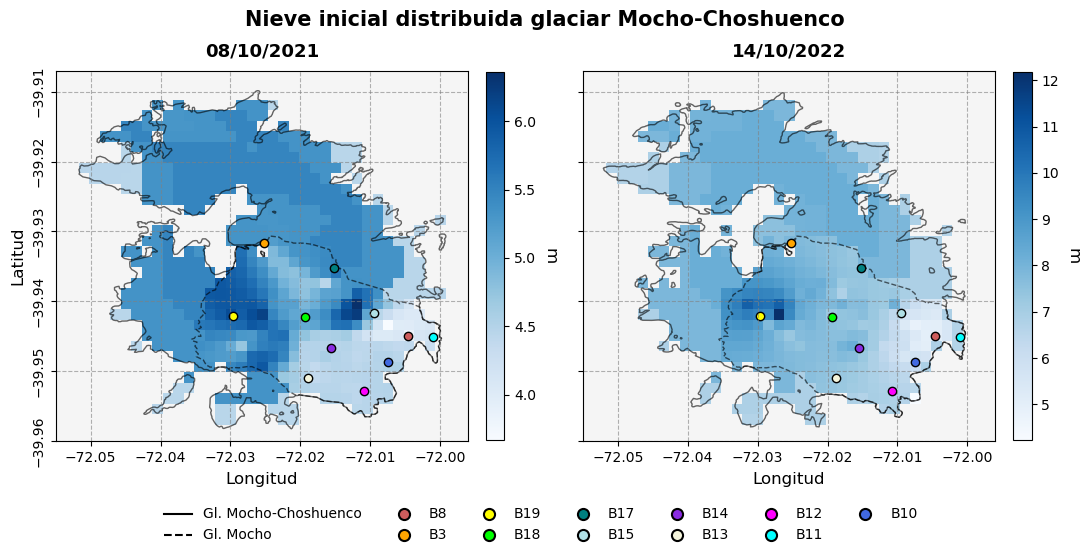

In [3]:
fig = plt.figure(figsize=(11,5))

colors = ['indianred','orange','yellow','lime','teal','powderblue','blueviolet','beige','fuchsia','cyan','royalblue']
stakes_names = points_gdf['layer'].to_list()

# 2021 - 2022
ax1 = fig.add_subplot(121)
fig_1 = init_snow_21.plot(ax=ax1,cmap='Blues',add_colorbar=False)
plt.colorbar(fig_1, ax=ax1, orientation='vertical', fraction=0.041, pad=0.04).set_label('m', fontsize=12,rotation=-90,labelpad=15)
glacier_21.plot(ax=ax1,facecolor="None",edgecolor="black",alpha=0.6,ls='-')
mocho_21.plot(ax=ax1,facecolor="None",edgecolor="black",alpha=0.6,ls='--')
for i in range(points_gdf.shape[0]):
    g_i = gpd.GeoDataFrame(points_gdf.iloc[i,:]).T
    g_i.set_geometry(g_i['geometry'],inplace=True)
    g_i.plot(ax=ax1,facecolor=colors[i],edgecolor="black")
ax1.set_facecolor("whitesmoke")
plt.grid(ls="--",color="gray",axis="both",alpha=0.6)
ax1.set_ylabel("Latitud",labelpad=5,fontsize=12)
ax1.set_xlabel("Longitud",labelpad=5,fontsize=12)
plt.yticks(rotation=90,fontsize=10,verticalalignment='center')
plt.xticks(rotation=0,fontsize=10)
ax1.set_aspect('equal')
ax1.set_xlim([-72.055, -71.996])
ax1.set_ylim([-39.96, -39.907])
plt.title('08/10/2021',fontsize=13,fontweight="bold",pad=10)

# 2022 - 2023
ax2 = fig.add_subplot(122)
fig_2 = init_snow_22.plot(ax=ax2,cmap='Blues',add_colorbar=False)
plt.colorbar(fig_2, ax=ax2, orientation='vertical', fraction=0.041, pad=0.04).set_label('m', fontsize=12,rotation=-90,labelpad=15)
glacier_22.plot(ax=ax2,facecolor="None",edgecolor="black",alpha=0.6,ls='-')
mocho_22.plot(ax=ax2,facecolor="None",edgecolor="black",alpha=0.6,ls='--')
for i in range(points_gdf.shape[0]):
    g_i = gpd.GeoDataFrame(points_gdf.iloc[i,:]).T
    g_i.set_geometry(g_i['geometry'],inplace=True)
    g_i.plot(ax=ax2,facecolor=colors[i],edgecolor="black")
ax2.set_facecolor("whitesmoke")
plt.grid(ls="--",color="gray",axis="both",alpha=0.6)
ax2.set_ylabel("",labelpad=5,fontsize=12)
ax2.set_xlabel("Longitud",labelpad=5,fontsize=12)
plt.yticks(rotation=90,fontsize=0,verticalalignment='center',color="white")
plt.xticks(rotation=0,fontsize=10)
ax2.set_aspect('equal')
ax2.set_xlim([-72.055, -71.996])
ax2.set_ylim([-39.96, -39.907])
plt.title('14/10/2022',fontsize=13,fontweight="bold",pad=10)

plt.suptitle('Nieve inicial distribuida glaciar Mocho-Choshuenco',fontsize=15,fontweight="bold",y=0.97)


point_legends = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
                               markersize=8, markeredgewidth=1.5, markeredgecolor='black',
                               label=stakes_names[i]) for i in range(len(stakes_names))]
# Crear leyendas personalizadas para los polígonos
glacier_patch = mlines.Line2D([], [], color='black', linestyle='-', label='Gl. Mocho-Choshuenco')
mocho_patch = mlines.Line2D([], [], color='black', linestyle='--', label='Gl. Mocho')
# Añadir todas las leyendas manualmente
fig.legend(handles=[glacier_patch, mocho_patch] + point_legends, fontsize=10,ncol=7,
           bbox_to_anchor=(0.85,0),frameon=False)


plt.tight_layout()
plt.rcParams.update({"savefig.facecolor": (0.0, 0.0, 0.0, 0)})
plt.show()

#fig.savefig('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/Figures/nieve_inicial.png',bbox_inches='tight',dpi=300)

## v2

/tmp/ipykernel_38918/3801296465.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


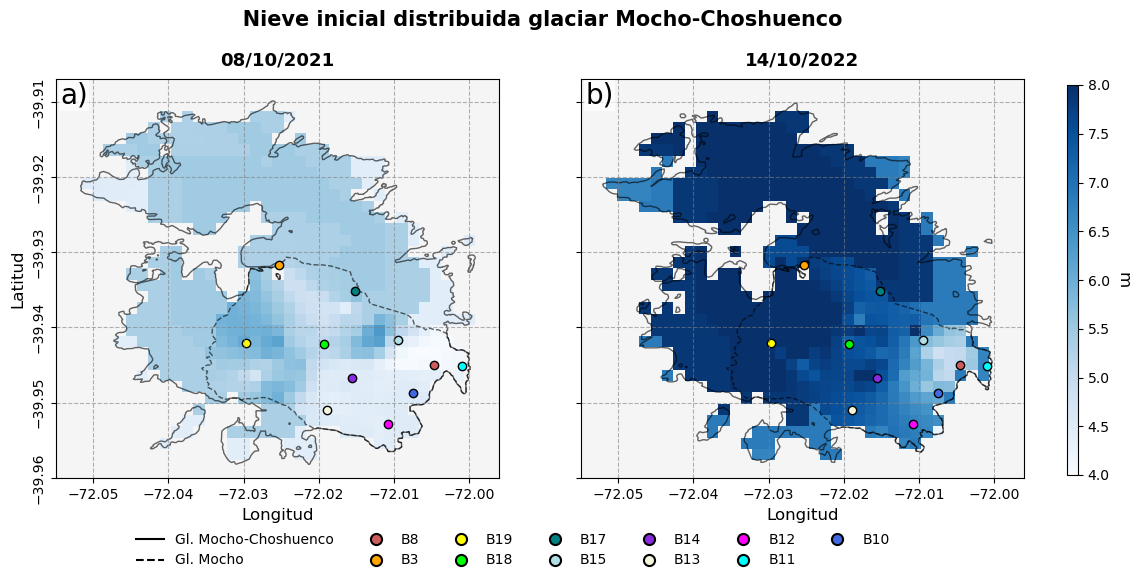

In [4]:
fig = plt.figure(figsize=(11,5))

colors = ['indianred','orange','yellow','lime','teal','powderblue','blueviolet','beige','fuchsia','cyan','royalblue']
stakes_names = points_gdf['layer'].to_list()

# 2021 - 2022
ax1 = fig.add_subplot(121)
fig_1 = init_snow_21.plot(ax=ax1,cmap='Blues',add_colorbar=False,vmin=4,vmax=8)
#plt.colorbar(fig_1, ax=ax1, orientation='vertical', fraction=0.041, pad=0.04).set_label('m', fontsize=12,rotation=-90,labelpad=15)
glacier_21.plot(ax=ax1,facecolor="None",edgecolor="black",alpha=0.6,ls='-')
mocho_21.plot(ax=ax1,facecolor="None",edgecolor="black",alpha=0.6,ls='--')
for i in range(points_gdf.shape[0]):
    g_i = gpd.GeoDataFrame(points_gdf.iloc[i,:]).T
    g_i.set_geometry(g_i['geometry'],inplace=True)
    g_i.plot(ax=ax1,facecolor=colors[i],edgecolor="black")
ax1.set_facecolor("whitesmoke")
plt.grid(ls="--",color="gray",axis="both",alpha=0.6)
ax1.set_ylabel("Latitud",labelpad=5,fontsize=12)
ax1.set_xlabel("Longitud",labelpad=5,fontsize=12)
plt.yticks(rotation=90,fontsize=10,verticalalignment='center')
plt.xticks(rotation=0,fontsize=10)
ax1.set_aspect('equal')
ax1.set_xlim([-72.055, -71.996])
ax1.set_ylim([-39.96, -39.907])
plt.title('08/10/2021',fontsize=13,fontweight="bold",pad=10)

# 2022 - 2023
ax2 = fig.add_subplot(122)
fig_2 = init_snow_22.plot(ax=ax2,cmap='Blues',add_colorbar=False,vmin=4,vmax=8)
#plt.colorbar(fig_2, ax=ax2, orientation='vertical', fraction=0.041, pad=0.04).set_label('m', fontsize=12,rotation=-90,labelpad=15)
glacier_22.plot(ax=ax2,facecolor="None",edgecolor="black",alpha=0.6,ls='-')
mocho_22.plot(ax=ax2,facecolor="None",edgecolor="black",alpha=0.6,ls='--')
for i in range(points_gdf.shape[0]):
    g_i = gpd.GeoDataFrame(points_gdf.iloc[i,:]).T
    g_i.set_geometry(g_i['geometry'],inplace=True)
    g_i.plot(ax=ax2,facecolor=colors[i],edgecolor="black")
ax2.set_facecolor("whitesmoke")
plt.grid(ls="--",color="gray",axis="both",alpha=0.6)
ax2.set_ylabel("",labelpad=5,fontsize=12)
ax2.set_xlabel("Longitud",labelpad=5,fontsize=12)
plt.yticks(rotation=90,fontsize=0,verticalalignment='center',color="white")
plt.xticks(rotation=0,fontsize=10)
ax2.set_aspect('equal')
ax2.set_xlim([-72.055, -71.996])
ax2.set_ylim([-39.96, -39.907])
plt.title('14/10/2022',fontsize=13,fontweight="bold",pad=10)

plt.suptitle('       Nieve inicial distribuida glaciar Mocho-Choshuenco',fontsize=15,fontweight="bold",y=1.02)


point_legends = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
                               markersize=8, markeredgewidth=1.5, markeredgecolor='black',
                               label=stakes_names[i]) for i in range(len(stakes_names))]
# Crear leyendas personalizadas para los polígonos
glacier_patch = mlines.Line2D([], [], color='black', linestyle='-', label='Gl. Mocho-Choshuenco')
mocho_patch = mlines.Line2D([], [], color='black', linestyle='--', label='Gl. Mocho')
# Añadir todas las leyendas manualmente
fig.legend(handles=[glacier_patch, mocho_patch] + point_legends, fontsize=10,ncol=7,
           bbox_to_anchor=(0.85,0),frameon=False)

cbar = fig.colorbar(fig_2, ax=[ax1, ax2], orientation='vertical', fraction=0, pad=0,
                    cax=fig.add_axes([1.0,0.09,0.01,0.78])).set_label('m', fontsize=12,rotation=-90,labelpad=15)


fig.text(0.01,0.94,"a)",transform=ax1.transAxes,fontsize=20,
         bbox=dict(facecolor='white', edgecolor='none', pad=1.0,alpha=0.7))
fig.text(0.01,0.94,"b)",transform=ax2.transAxes,fontsize=20,
         bbox=dict(facecolor='white', edgecolor='none', pad=1.0,alpha=0.7))


plt.tight_layout()
plt.rcParams.update({"savefig.facecolor": (0.0, 0.0, 0.0, 0)})
plt.show()

#fig.savefig('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/Figures/nieve_inicial_v2.png',bbox_inches='tight',dpi=300)